In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [7]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

The x Coefficient is: [[ 0.20299973]]
  The y Intercept is: [ 0.45931465]
  The Rsq (score) is: 0.6922946529146998

An extrapolation example with 95 deg F ground temp results in: [[ 19.74428913]] chirps per second.
An interpolation example with 18 chirps detected results in: [[ 86.40743135]] ground temp.


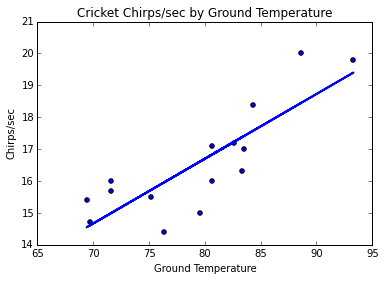

In [8]:
plt.scatter(df[['Ground Temperature']],df[['Chirps/Second']])
plt.title("Cricket Chirps/sec by Ground Temperature")
rline = linear_model.LinearRegression()
rline.fit(df[['Ground Temperature']],df[['Chirps/Second']])
plt.plot(df[['Ground Temperature']],
         rline.predict(df[['Ground Temperature']]), 
         color='blue', 
         linewidth = 2)
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/sec")

print("The x Coefficient is: {}".format(rline.coef_))
print("  The y Intercept is: {}".format(rline.intercept_))
print("  The Rsq (score) is: {}".format(rline.score(df[['Ground Temperature']],df[['Chirps/Second']])))

chirp = (95 * rline.coef_) + rline.intercept_

print("\nAn extrapolation example with 95 deg F ground temp results in: {} chirps per second.".format(chirp))

temp = (18 - rline.intercept_) / rline.coef_

print("An interpolation example with 18 chirps detected results in: {} ground temp.".format(temp))


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [2]:
dff = pd.read_fwf("brain_body.txt")
plt.scatter(dff[['Brain']],dff[['Body']])
plt.title("Unknown Mammals: Brain wgt by Body wgt")
rrline = linear_model.LinearRegression()
rrline.fit(dff[['Brain']],dff[['Body']])
plt.plot(dff[['Brain']],
         rline.predict(dff[['Brain']]), 
         color='blue', 
         linewidth = 2)
plt.xlabel("Brain Weight (units ukn)")
plt.ylabel("Body Weight (units ukn)")

print("The x Coefficient is: {}".format(rrline.coef_))
print("  The y Intercept is: {}".format(rrline.intercept_))
print("  The Rsq (score) is: {}".format(rrline.score(dff[['Brain']],dff[['Body']])))

NameError: name 'pd' is not defined

In [ ]:
print("There are two very large outliers; likely a whale and an elephant (unverified)")
print("The linear model was run again without the largest two values\n")

dffm = dff[dff.Brain <=2000]           # removed the two outliers. the DataFrame now is 'dffm'

plt.scatter(dffm[['Brain']],dffm[['Body']])
plt.title("Unknown Mammals: Brain wgt by Body wgt\n Without Outliers")
rrline = linear_model.LinearRegression()
rrline.fit(dffm[['Brain']],dffm[['Body']])
plt.plot(dffm[['Brain']],
         rline.predict(dffm[['Brain']]), 
         color='blue', 
         linewidth = 2)
plt.xlabel("Brain Weight (units ukn)")
plt.ylabel("Body Weight (units ukn)")

print("The x Coefficient is: {}".format(rrline.coef_))
print("  The y Intercept is: {}".format(rrline.intercept_))
print("  The Rsq (score) is: {}".format(rrline.score(dffm[['Brain']],dffm[['Body']])))

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [ ]:
dfff = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
'''
First ran some histograms to look at the data
'''
plt.hist(dfff.Sex)
plt.title("0=Male, 1=Female")
plt.show()
print("More than twice as many males as female Professors")

plt.hist(dfff.Rank)
plt.title("0=AssoProf, 1=AssiProf, 3=FullProf ")
plt.show()
print("Rank distribution seems unremarkable")

plt.hist(dfff.Year)
plt.title("Years at current rank")
plt.show()
print("Years at rank covers many years\nalthough the distribution seems reasonable.")
print("The length of time at rank tapers over time.")

plt.hist(dfff.Degree)
plt.title('0=Masters, 1=Doctorate')
plt.show()
print("Twice as many Professors with PhDs than Masters")

plt.hist(dfff.YSdeg)
plt.title("Years since Degree")
plt.show()
print("Flat distribution execept for high n < 5 yrs.")
print("Covers 35 years.")

plt.hist(dfff.Salary)
plt.title("Annual Salary")
plt.show()
print("Bimodal salary peeks. One at lowest, One at midpoint.")

plt.scatter(dfff.Sex, dfff.Salary)
plt.title("Scatter of Sex vs Salary")
plt.show()
print("The highest salary goes to a woman. \nThe rest of female salaries are < 27000.")
print("Scatter data allows a visualization of salary distribution by gender.")


In [ ]:
dfff = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex",             # 1 = female, 0 = male
                        "Rank",            # 1 = assoProf, 2 = assiProf, 3 = fullProf
                        "Year",            # Years in current rank
                        "Degree",          # 1 = Doctorate, 0 = Masters
                        "YSdeg",           # Years since grad of highest deg
                        "Salary"]          # annual salary
                  )

input = dfff[['Sex','Rank','Year','Degree','YSdeg']]
output = dfff['Salary']                    # how important is 'sex' in predicting salary?
regrm = linear_model.LinearRegression()
regrm.fit(input, output)

print("Coefficients for Sex, Rank, Year, Degree, YSdeg; followed by Y-intercept:\n")
print(regrm.coef_,regrm.intercept_)
print("\nRsq: {} ".format(regrm.score(input, output)))

In [ ]:
'''
Removed the YSdeg (Years since graduation) since seemed least relevant.
'''

dfffm = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex",             # 1 = female, 0 = male
                        "Rank",            # 1 = assoProf, 2 = assiProf, 3 = fullProf
                        "Year",            # Years in current rank
                        "Degree",          # 1 = Doctorate, 0 = Masters
                        "Salary"]          # annual salary
                  )

inputm = dfffm[['Sex','Rank','Year','Degree']]
outputm = dfffm['Salary']                    # how important is 'sex' in predicting salary?

regrm = linear_model.LinearRegression()
regrm.fit(inputm, outputm)
print("Coefficients for Sex, Rank, Year, Degree; followed by Y-intercept:\n")
print(regrm.coef_,regrm.intercept_)
print("\nRsq: {} ".format(regrm.score(inputm, outputm)))

In [ ]:
'''
Highest paid woman may be skewing the results.
Removed the row with highest paid woman.
'''

dffftrim = dfffm[dfffm.Salary != 38045]      # removed the highest paid female, reran last model.
inputtr = dffftrim[['Sex','Rank','Year','Degree']]
outputtr = dffftrim['Salary']                    # how important is 'sex' in predicting salary?

regrm = linear_model.LinearRegression()
regrm.fit(inputtr, outputtr)
print("Coefficients for Sex, Rank, Year, Degree; followed by Y-intercept:\n")
print(regrm.coef_,regrm.intercept_)
print("\nHighest Rsq: {} ".format(regrm.score(inputtr, outputtr)))
print("\nThe gender coefficient = 5197.  Male = 0, Female = 1, in the model.")
print("A female adds 5197 to the salary; a male adds nothing.")
print("\nThe model:")
print("[Sex]*5197.1 + [Rank]*465.9 + [Year]*-1570.6 + [Degree]*-126.2 + 12573.1 = SALARY")


Observations: 
1. A female adds $5197 to the salary model; a male adds zero when predicting salary.
2. Removing the top salary (a female), improves the R squared score. Does it improve the representation of lower paid female workers?
3. Further research is necessary to see why being female adds $ to the model yet females seem to earn less.  
    Are females weighted toward less rank, time, or education? 